In [1]:
from tensorflow.keras.layers import Dense,Concatenate,Input
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

In [2]:
init=tf.keras.initializers.he_uniform(seed=5)
checkpoint_filepath='Weights\\best.h5'

In [3]:
def model_ind(input_shape,n_classes):
    inp=keras.Input(shape=input_shape)
    x=Dense(units=64,kernel_initializer=init,activation='relu')(inp)
    x=Dense(units=64,kernel_initializer=init,activation='relu')(x)
    x=Dense(units=input_shape[0])(x)
    
    model=keras.Model(inp,x)
    return model

In [4]:
#importing actual image data and edge image data
df1=pd.read_csv('Datasets\\imageData2_asl.csv')
df2=pd.read_csv('imageData4_asl.csv')

In [5]:
df1=df1.iloc[:,1:]
df2=df2.iloc[:,1:]

In [6]:
#creating separate models for original and edge image
n_classes_1=len(np.unique(df1.iloc[:,-1]))
n_classes_2=len(np.unique(df2.iloc[:,-1]))
shape_1=(df1.shape[1]-1,)
shape_2=(df2.shape[1]-1,)
m_1=model_ind(shape_1,n_classes_1)
m_2=model_ind(shape_2,n_classes_2)

In [7]:
input_1=keras.Input(shape=shape_1)
input_2=keras.Input(shape=shape_2)
out_1=m_1(input_1)
out_2=m_2(input_2)

In [8]:
#combining both models
concat=Concatenate()([out_1,out_2])
x=Dense(units=64,kernel_initializer=init,activation='relu')(concat)
x=Dense(units=64,kernel_initializer=init,activation='relu')(concat)
x=Dense(units=n_classes_1,activation='softmax')(x)

model=keras.Model([input_1,input_2],x)

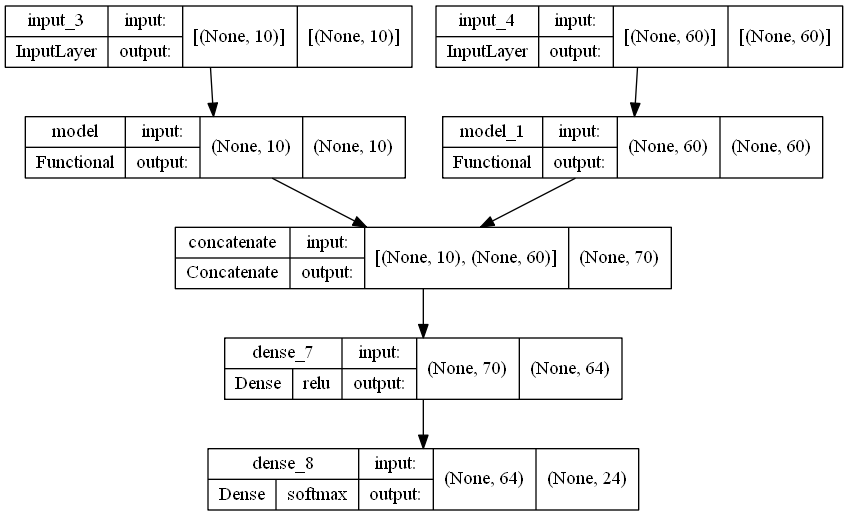

In [9]:
tf.keras.utils.plot_model(model,show_shapes=True,
    show_layer_names=True,show_layer_activations=True)

In [10]:
df=df1.iloc[:,:-1]
df

,1,2,3,4,5,6,7,8,9,10
0,-82.524479,47.388165,-39.771326,-82.152834,55.006259,-9.010180,-11.717958,12.971373,-64.983323,11.636886
1,-76.351277,46.629360,-9.739033,-96.700418,38.032880,-23.298969,-20.804790,-0.664270,-64.770680,18.237608
2,-47.113030,56.473809,57.462268,-107.786400,-20.498027,-110.526932,-7.703781,4.620059,2.213367,-5.162188
3,-13.237930,-91.307944,-23.370699,-8.790358,-15.949835,-55.893564,8.754946,43.754445,-15.362971,1.812439
4,41.584813,-73.528197,93.022702,-27.960750,33.645303,-32.773249,36.209377,-11.433392,38.078933,13.842500
...,...,...,...,...,...,...,...,...,...,...
71995,89.924741,2.794544,-24.052779,-12.128910,-75.635920,21.593407,-36.736248,2.402413,8.003743,11.122074
71996,88.465407,1.957411,-19.433434,-13.747671,-78.056361,22.672287,-33.447128,1.790123,9.861433,12.523555
71997,87.011791,1.028096,-15.527040,-15.104184,-80.001229,24.098923,-29.200737,1.113524,10.866318,13.378817
71998,85.605554,-0.206619,-12.224889,-15.787169,-81.601288,24.553916,-24.686110,0.615090,11.285654,13.408633


In [11]:
for i in range(10,10+df2.shape[1]):
    l=list(df2.iloc[:,i-10])
    df[str(i+1)]=l
df

,1,2,3,4,5,6,7,8,9,10,...,62,63,64,65,66,67,68,69,70,71
0,-82.524479,47.388165,-39.771326,-82.152834,55.006259,-9.010180,-11.717958,12.971373,-64.983323,11.636886,...,0.648665,0.293519,0.685291,0.408004,-0.935525,0.979798,0.426294,0.395430,-0.067376,A
1,-76.351277,46.629360,-9.739033,-96.700418,38.032880,-23.298969,-20.804790,-0.664270,-64.770680,18.237608,...,-0.883286,-0.277645,-0.377849,-1.355678,-1.394094,0.402903,0.904139,-0.588686,0.134083,A
2,-47.113030,56.473809,57.462268,-107.786400,-20.498027,-110.526932,-7.703781,4.620059,2.213367,-5.162188,...,-0.238603,0.160752,0.330814,0.755128,0.670219,-0.001443,-1.021693,-1.171014,1.742843,A
3,-13.237930,-91.307944,-23.370699,-8.790358,-15.949835,-55.893564,8.754946,43.754445,-15.362971,1.812439,...,-1.428162,-0.409125,0.480302,0.025718,1.259826,0.580799,-1.037605,-0.662842,-0.265380,A
4,41.584813,-73.528197,93.022702,-27.960750,33.645303,-32.773249,36.209377,-11.433392,38.078933,13.842500,...,-0.550548,0.362601,-0.954786,1.110806,0.443385,-0.584769,-0.584453,-0.481189,0.580313,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71995,89.924741,2.794544,-24.052779,-12.128910,-75.635920,21.593407,-36.736248,2.402413,8.003743,11.122074,...,-0.013887,1.594512,-0.879106,-0.320288,-1.057030,-0.190036,-0.303015,0.590503,-0.249860,Y
71996,88.465407,1.957411,-19.433434,-13.747671,-78.056361,22.672287,-33.447128,1.790123,9.861433,12.523555,...,0.623977,1.299370,-1.801523,0.711709,-0.354166,0.143655,-0.813517,0.413117,-0.696391,Y
71997,87.011791,1.028096,-15.527040,-15.104184,-80.001229,24.098923,-29.200737,1.113524,10.866318,13.378817,...,0.675678,1.892174,-0.589328,0.796611,-0.073139,0.030751,-0.572499,0.353840,-0.203862,Y
71998,85.605554,-0.206619,-12.224889,-15.787169,-81.601288,24.553916,-24.686110,0.615090,11.285654,13.408633,...,-0.119025,2.097909,0.043242,1.090226,-0.633478,0.349534,0.256267,0.677477,-0.084256,Y


In [12]:
#train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1], test_size=0.2, random_state=42)

In [13]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
le=LabelEncoder()
y_train = le.fit_transform(y_train)
y_train = np_utils.to_categorical(y_train)

In [15]:
y_test = le.transform(y_test)
y_test = np_utils.to_categorical(y_test)

In [16]:
#Cambridge dataset
callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,save_weights_only=True,monitor='val_accuracy',mode='max',save_best_only=True)]
history=model.fit([X_train.iloc[:,:10],X_train.iloc[:,10:]],y_train,validation_data=([X_test.iloc[:,:10],X_test.iloc[:,10:]],y_test),batch_size=16,epochs=150,callbacks=callbacks)

Epoch 1/150
3600/3600 [==============================] - 31s 8ms/step - loss: 2.4766 - accuracy: 0.3543 - val_loss: 1.2924 - val_accuracy: 0.5684
Epoch 2/150
3600/3600 [==============================] - 25s 7ms/step - loss: 1.0361 - accuracy: 0.6492 - val_loss: 0.8680 - val_accuracy: 0.7078
Epoch 3/150
3600/3600 [==============================] - 25s 7ms/step - loss: 0.7212 - accuracy: 0.7535 - val_loss: 0.6621 - val_accuracy: 0.7728
Epoch 4/150
3600/3600 [==============================] - 25s 7ms/step - loss: 0.5728 - accuracy: 0.8008 - val_loss: 0.5523 - val_accuracy: 0.8088
Epoch 5/150
3600/3600 [==============================] - 25s 7ms/step - loss: 0.4897 - accuracy: 0.8293 - val_loss: 0.4701 - val_accuracy: 0.8285
Epoch 6/150
3600/3600 [==============================] - 25s 7ms/step - loss: 0.4379 - accuracy: 0.8455 - val_loss: 0.4541 - val_accuracy: 0.8442
Epoch 7/150
3600/3600 [==============================] - 24s 7ms/step - loss: 0.3981 - accuracy: 0.8614 - val_loss: 0.4022 -

Epoch 57/150
3600/3600 [==============================] - 25s 7ms/step - loss: 0.1883 - accuracy: 0.9487 - val_loss: 0.2707 - val_accuracy: 0.9308
Epoch 58/150
3600/3600 [==============================] - 25s 7ms/step - loss: 0.1966 - accuracy: 0.9469 - val_loss: 0.2453 - val_accuracy: 0.9407
Epoch 59/150
3600/3600 [==============================] - 26s 7ms/step - loss: 0.2003 - accuracy: 0.9496 - val_loss: 0.2806 - val_accuracy: 0.9331
Epoch 60/150
3600/3600 [==============================] - 26s 7ms/step - loss: 0.1917 - accuracy: 0.9499 - val_loss: 0.3047 - val_accuracy: 0.9297
Epoch 61/150
3600/3600 [==============================] - 26s 7ms/step - loss: 0.1918 - accuracy: 0.9502 - val_loss: 0.2847 - val_accuracy: 0.9363
Epoch 62/150
3600/3600 [==============================] - 26s 7ms/step - loss: 0.1942 - accuracy: 0.9487 - val_loss: 0.3080 - val_accuracy: 0.9297
Epoch 63/150
3600/3600 [==============================] - 25s 7ms/step - loss: 0.1945 - accuracy: 0.9484 - val_loss: 0

In [17]:
model.load_weights(checkpoint_filepath)
model.evaluate([X_test.iloc[:,:10],X_test.iloc[:,10:]],y_test)

450/450 [==============================] - 3s 6ms/step - loss: 0.2583 - accuracy: 0.9537


[0.25830474495887756, 0.9536805748939514]

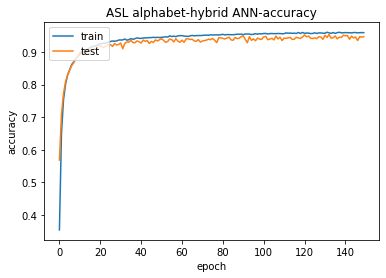

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ASL alphabet-hybrid ANN-accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

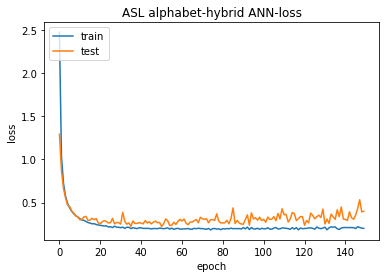

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ASL alphabet-hybrid ANN-loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()